<center> <font size=6> Kaggle challenge </font> </center>
<center> <i> GroudTruth Team </i> </center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Information-about-the-dataset" data-toc-modified-id="Information-about-the-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Information about the dataset</a></span><ul class="toc-item"><li><span><a href="#Dataset-Features" data-toc-modified-id="Dataset-Features-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dataset Features</a></span></li><li><span><a href="#Class-Labels-(8-Classes)" data-toc-modified-id="Class-Labels-(8-Classes)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Class Labels (8 Classes)</a></span></li><li><span><a href="#Profile-Report" data-toc-modified-id="Profile-Report-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Profile Report</a></span></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#NA-Cleaning" data-toc-modified-id="NA-Cleaning-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>NA Cleaning</a></span></li><li><span><a href="#Date" data-toc-modified-id="Date-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Date</a></span><ul class="toc-item"><li><span><a href="#Regex-parsing-for-date-extraction" data-toc-modified-id="Regex-parsing-for-date-extraction-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Regex parsing for date extraction</a></span></li><li><span><a href="#Applying-transformation-to-the-dataset" data-toc-modified-id="Applying-transformation-to-the-dataset-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Applying transformation to the dataset</a></span></li><li><span><a href="#Creating-date-features" data-toc-modified-id="Creating-date-features-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Creating date features</a></span></li></ul></li><li><span><a href="#Categorical-encoding" data-toc-modified-id="Categorical-encoding-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Categorical encoding</a></span><ul class="toc-item"><li><span><a href="#weekday--&gt;-One-Hot-Encoding" data-toc-modified-id="weekday-->-One-Hot-Encoding-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>weekday -&gt; One-Hot Encoding</a></span></li></ul></li><li><span><a href="#Dropping-classes" data-toc-modified-id="Dropping-classes-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Dropping classes</a></span></li></ul></li><li><span><a href="#Final-dataset-overview" data-toc-modified-id="Final-dataset-overview-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final dataset overview</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#For-one-class-first" data-toc-modified-id="For-one-class-first-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>For one class first</a></span><ul class="toc-item"><li><span><a href="#Splitting-train-/-test" data-toc-modified-id="Splitting-train-/-test-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Splitting train / test</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Prediction</a></span></li></ul></li><li><span><a href="#GridSearch-for-one-class" data-toc-modified-id="GridSearch-for-one-class-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>GridSearch for one class</a></span></li><li><span><a href="#For-all-classes" data-toc-modified-id="For-all-classes-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>For all classes</a></span></li></ul></li><li><span><a href="#Generating-submissions-for-Kaggle" data-toc-modified-id="Generating-submissions-for-Kaggle-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Generating submissions for Kaggle</a></span><ul class="toc-item"><li><span><a href="#Pipeline-function" data-toc-modified-id="Pipeline-function-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Pipeline function</a></span></li></ul></li></ul></div>

# Import modules

In [1]:
import os
import json

import warnings
warnings.filterwarnings('ignore')

from tqdm.notebook import tqdm

import numpy as np

import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, log_loss

import xgboost as xgb

# Import data

In [2]:
os.listdir()

['submission_tony.csv',
 'skeleton_code_ml.py',
 '.DS_Store',
 'LICENSE',
 'sample_submission_ml.csv',
 '2EL1730-ML-Kaggle_Challenge_Description.pdf',
 'test_ml.csv',
 'models',
 'README.md',
 'train_ml.csv',
 '.gitignore',
 'XGBClassifier_optimal_parameters.json',
 '.ipynb_checkpoints',
 '2EL1730-ML-Kaggle_Challenge_Instructions.pdf',
 '.git',
 'kaggle_challenge.ipynb']

In [3]:
df = pd.read_csv('train_ml.csv').drop(columns=['Unnamed: 0'])
df_test = pd.read_csv('test_ml.csv').drop(columns=['Unnamed: 0'])

df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,47.0,25556,0,1,0,0,0,0,0,1
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,46.0,19930,1,1,0,0,0,0,0,0
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,21.0,4,0,1,0,0,0,0,0,1
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,52.0,96568,0,0,1,0,0,0,0,0
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,81.0,95131,0,1,0,0,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39671 entries, 0 to 39670
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              39671 non-null  object 
 1   org               37994 non-null  object 
 2   tld               37992 non-null  object 
 3   ccs               39671 non-null  int64  
 4   bcced             39671 non-null  int64  
 5   mail_type         39573 non-null  object 
 6   images            39671 non-null  int64  
 7   urls              39671 non-null  int64  
 8   salutations       39671 non-null  int64  
 9   designation       39671 non-null  int64  
 10  chars_in_subject  39660 non-null  float64
 11  chars_in_body     39671 non-null  int64  
 12  updates           39671 non-null  int64  
 13  personal          39671 non-null  int64  
 14  promotions        39671 non-null  int64  
 15  forums            39671 non-null  int64  
 16  purchases         39671 non-null  int64 

# Information about the dataset

## Dataset Features

- date - unix style date format, date-time on which the email was received, e.g. Sat, 2 Jul 2016 11:02:58 +0530
- org - organisation of the sender, e.g. centralesupelec, facebook, and google.
- tld - top level domain of the organisation, eg. com, ac.in, fr, and org.
- ccs - number of emails cced with this email, e.g. 0, 2, and 10.
- bcced - is the receiver bcc'd in the email. Can take two values: 0 or 1.
- mail_type - type of the mail body, e.g. text/plain and text/html.
- images - number of images in the mail body, e.g. 0, 1, and 100.
- urls - number of urls in the mail body, e.g. 0, 1, and 50.
- salutations - is salutation used in the email? Either 0 or 1.
- designation - is designation of the sender mentioned in the email. Either 0 or 1.
- chars_in_subject - number of characters in the mail subject, e.g. 0, 1, and 10.
- chars_in_body - number of characters in the mail body, e.g. 10 and 10000.
- labels - last eight columns represent eight classes, 0 means that label is not present for this row and 1 means that label is present, multiple label columsn can be 1. Label columns are only present in train.csv. test.csv has features only.

## Class Labels (8 Classes)
- updates
- personal
- promotions
- forums
- purchases
- travel
- spam
- social

In [5]:
df.isnull().sum()

date                   0
org                 1677
tld                 1679
ccs                    0
bcced                  0
mail_type             98
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject      11
chars_in_body          0
updates                0
personal               0
promotions             0
forums                 0
purchases              0
travel                 0
spam                   0
social                 0
dtype: int64

## Profile Report

In [6]:
if False: # set to True to generate a new report
    profile = ProfileReport(df, title='Profiling Report')
    profile.to_file("profile_report.html")

# Data Analysis

In [7]:
df.columns

Index(['date', 'org', 'tld', 'ccs', 'bcced', 'mail_type', 'images', 'urls',
       'salutations', 'designation', 'chars_in_subject', 'chars_in_body',
       'updates', 'personal', 'promotions', 'forums', 'purchases', 'travel',
       'spam', 'social'],
      dtype='object')

In [8]:
list_classes = ['updates', 'personal', 'promotions', 'forums', 'purchases', 'travel',
       'spam', 'social']

In [9]:
df[list_classes].idxmax(axis=1).value_counts()

personal      21767
updates       14377
promotions     1747
forums         1361
social          419
dtype: int64

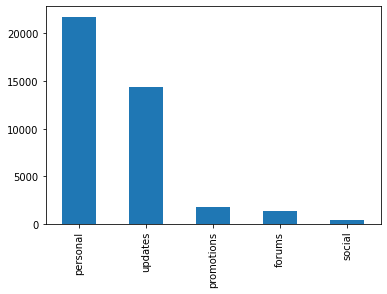

In [10]:
df[list_classes].idxmax(axis=1).value_counts().plot.bar();

In [11]:
numerical_features = ["ccs", "images", "urls", "chars_in_subject", "chars_in_body"]
df[numerical_features]

,ccs,images,urls,chars_in_subject,chars_in_body
0,0,4,28,47.0,25556
1,0,6,32,46.0,19930
2,0,0,0,21.0,4
3,0,108,171,52.0,96568
4,0,20,166,81.0,95131
...,...,...,...,...,...
39666,0,11,31,32.0,44952
39667,0,0,0,57.0,721
39668,0,0,0,28.0,571
39669,0,27,136,24.0,92847


In [12]:
df[numerical_features].describe()

,ccs,images,urls,chars_in_subject,chars_in_body
count,39671.000000,39671.000000,39671.000000,39660.000000,3.967100e+04
mean,0.378967,9.806332,36.731088,51.442032,2.321781e+05
std,2.530353,440.393286,144.379127,34.142227,2.251044e+06
min,0.000000,0.000000,0.000000,0.000000,4.000000e+00
25%,0.000000,0.000000,4.500000,31.000000,4.903000e+03
50%,0.000000,2.000000,18.000000,43.000000,2.000500e+04
75%,0.000000,9.000000,47.000000,63.000000,4.800100e+04
max,155.000000,83480.000000,21540.000000,528.000000,7.438108e+07


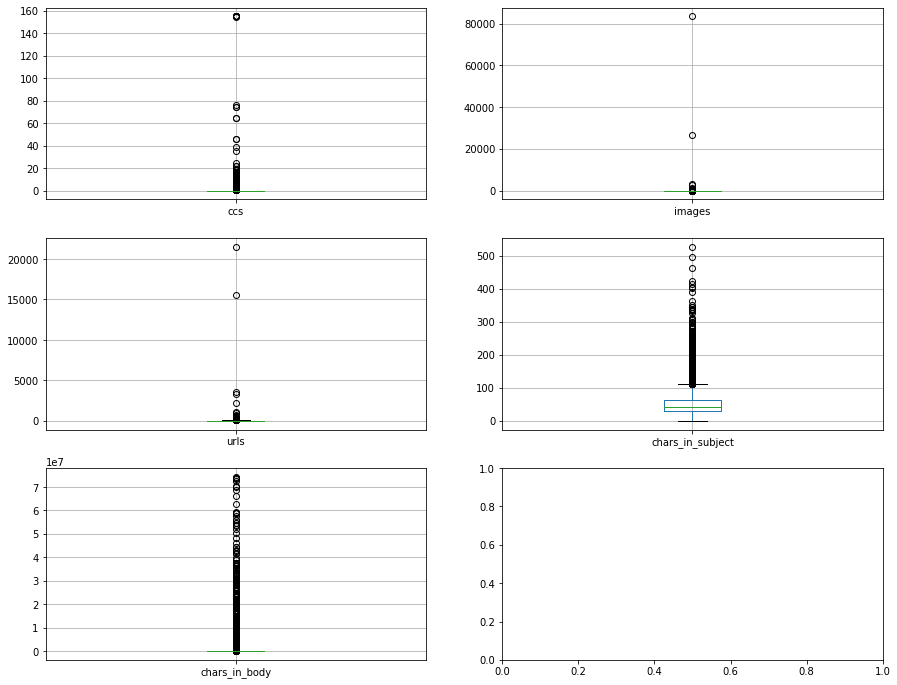

In [13]:
fig, axs = plt.subplots(3, 2, figsize=(15, 12), sharey=False)

for idx, (col, ax) in enumerate(zip(numerical_features, axs.ravel())):
    df[numerical_features].boxplot(col, ax=ax)

In [14]:
df['class'] = df[list_classes].idxmax(axis=1)
df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,...,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social,class
0,"Mon, 15 Oct 2018 08:03:09 +0000 (UTC)",researchgatemail,net,0,0,multipart/alternative,4,28,0,1,...,25556,0,1,0,0,0,0,0,1,personal
1,"Thu, 17 Apr 2014 09:12:33 -0700 (PDT)",no-ip,com,0,0,multipart/alternative,6,32,0,0,...,19930,1,1,0,0,0,0,0,0,updates
2,"Thu, 27 Oct 2016 01:36:28 +0000",mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,...,4,0,1,0,0,0,0,0,1,personal
3,"Fri, 16 Oct 2020 08:06:31 +0000 (GMT)",insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,...,96568,0,0,1,0,0,0,0,0,promotions
4,"Thu, 02 Jul 2015 10:16:46 +0000",twitter,com,0,0,multipart/alternative,20,166,0,0,...,95131,0,1,0,0,0,0,0,1,personal


In [15]:
if False: # set to True to generate figure
    sns.pairplot(df[numerical_features + ['class']], hue='class');

# Preprocessing

## NA Cleaning

In [16]:
len(df)

39671

In [17]:
df.isna().sum()

date                   0
org                 1677
tld                 1679
ccs                    0
bcced                  0
mail_type             98
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject      11
chars_in_body          0
updates                0
personal               0
promotions             0
forums                 0
purchases              0
travel                 0
spam                   0
social                 0
class                  0
dtype: int64

In [18]:
len(df.dropna(how='any'))

37939

In [19]:
len(df.dropna(how='any')) / len(df)

0.9563409039348643

In [20]:
df = df.dropna(how='any')
df.isna().sum()

date                0
org                 0
tld                 0
ccs                 0
bcced               0
mail_type           0
images              0
urls                0
salutations         0
designation         0
chars_in_subject    0
chars_in_body       0
updates             0
personal            0
promotions          0
forums              0
purchases           0
travel              0
spam                0
social              0
class               0
dtype: int64

## Date

### Regex parsing for date extraction

For one example:

In [21]:
string = "Mon, 15 Oct 2018 08:03:09 +0000 (UTC)"
pattern = r'(\d{1,2}.*\d{2}:\d{2}:\d{2}) ([+-]\d{2}\d{2})'
ans = re.search(pattern, string)

In [22]:
date = ''.join([ans.group(1), ans.group(2)])
date

'15 Oct 2018 08:03:09+0000'

In [23]:
pd.to_datetime(date)

Timestamp('2018-10-15 08:03:09+0000', tz='UTC')

### Applying transformation to the dataset

Now let's apply the transformation to the dataset:

In [24]:
def format_date(row):
    pattern = r'(\d{1,2}.*\d{2}:\d{2}:\d{2}) ([+-]\d{2}\d{2})'
    
    ans = re.search(pattern, string=row)
    
    if ans:
        if ans.group(1)[1] == ' ':
            return ''.join(['0', ans.group(1), ans.group(2)])
        else:
            return ''.join([ans.group(1), ans.group(2)])
    else:
        return np.nan

In [25]:
df['date'] = pd.to_datetime(df['date'].apply(format_date), utc=True)
df['date']

0       2018-10-15 08:03:09+00:00
1       2014-04-17 16:12:33+00:00
2       2016-10-27 01:36:28+00:00
3       2020-10-16 08:06:31+00:00
4       2015-07-02 10:16:46+00:00
                   ...           
39665   2019-10-16 06:20:00+00:00
39666   2019-10-08 18:58:39+00:00
39668   2017-04-03 13:25:47+00:00
39669   2018-06-14 00:46:51+00:00
39670   2020-04-17 14:06:27+00:00
Name: date, Length: 37939, dtype: datetime64[ns, UTC]

In [26]:
df['date'].iloc[0]

Timestamp('2018-10-15 08:03:09+0000', tz='UTC')

In [27]:
df.head()

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,...,chars_in_body,updates,personal,promotions,forums,purchases,travel,spam,social,class
0,2018-10-15 08:03:09+00:00,researchgatemail,net,0,0,multipart/alternative,4,28,0,1,...,25556,0,1,0,0,0,0,0,1,personal
1,2014-04-17 16:12:33+00:00,no-ip,com,0,0,multipart/alternative,6,32,0,0,...,19930,1,1,0,0,0,0,0,0,updates
2,2016-10-27 01:36:28+00:00,mail,goodreads.com,0,0,multipart/mixed,0,0,0,0,...,4,0,1,0,0,0,0,0,1,personal
3,2020-10-16 08:06:31+00:00,insideapple,apple.com,0,0,multipart/alternative,108,171,0,0,...,96568,0,0,1,0,0,0,0,0,promotions
4,2015-07-02 10:16:46+00:00,twitter,com,0,0,multipart/alternative,20,166,0,0,...,95131,0,1,0,0,0,0,0,1,personal


### Creating date features

In [28]:
df['date_day'] = df['date'].dt.date
df['date_day']

0        2018-10-15
1        2014-04-17
2        2016-10-27
3        2020-10-16
4        2015-07-02
            ...    
39665    2019-10-16
39666    2019-10-08
39668    2017-04-03
39669    2018-06-14
39670    2020-04-17
Name: date_day, Length: 37939, dtype: object

In [29]:
df['date_day'].value_counts()

2017-04-07    94
2017-04-06    85
2016-07-06    71
2016-07-08    58
2016-07-09    55
              ..
2013-07-02     1
2015-12-27     1
2013-03-25     1
2012-04-21     1
2012-12-16     1
Name: date_day, Length: 2847, dtype: int64

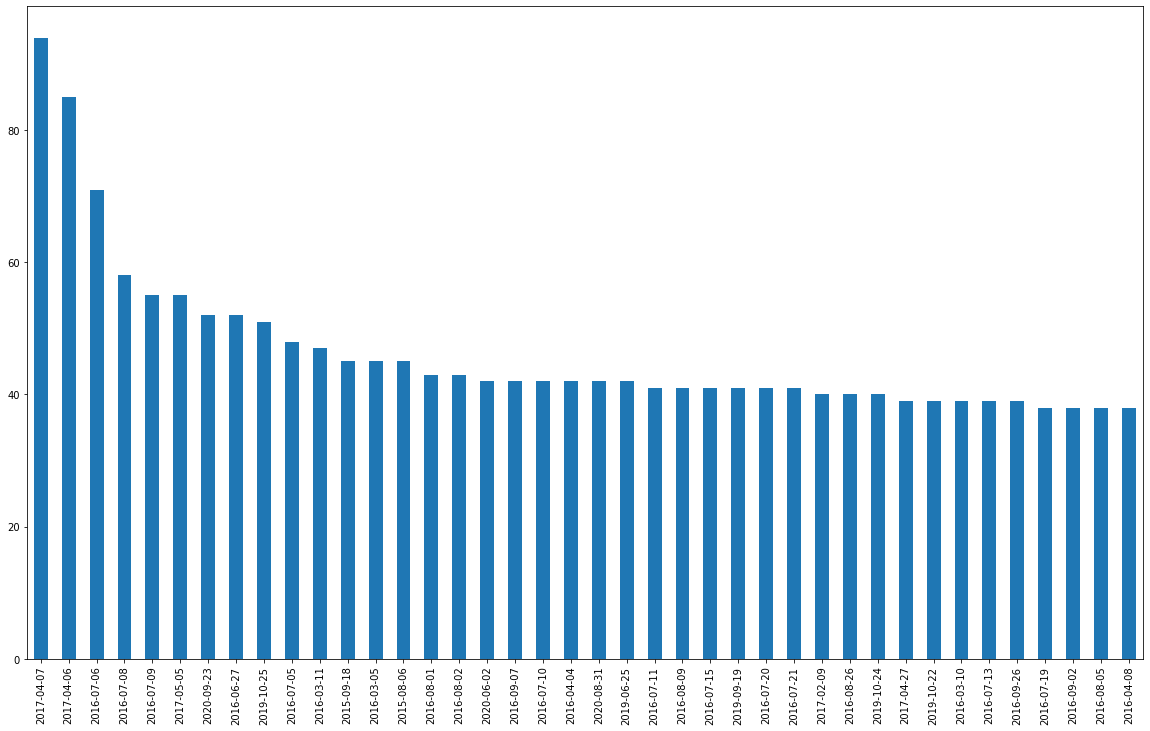

In [30]:
plt.figure(figsize=(20,12))
df['date_day'].value_counts().head(40).plot.bar();

In [31]:
df['month'] = df['date'].dt.month
df['month']

0        10.0
1         4.0
2        10.0
3        10.0
4         7.0
         ... 
39665    10.0
39666    10.0
39668     4.0
39669     6.0
39670     4.0
Name: month, Length: 37939, dtype: float64

In [32]:
df['weekday'] = df['date'].dt.weekday
df['weekday']

0        0.0
1        3.0
2        3.0
3        4.0
4        3.0
        ... 
39665    2.0
39666    1.0
39668    0.0
39669    3.0
39670    4.0
Name: weekday, Length: 37939, dtype: float64

In [33]:
df['hour'] = df['date'].dt.hour
df['hour']

0         8.0
1        16.0
2         1.0
3         8.0
4        10.0
         ... 
39665     6.0
39666    18.0
39668    13.0
39669     0.0
39670    14.0
Name: hour, Length: 37939, dtype: float64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37939 entries, 0 to 39670
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   date              37893 non-null  datetime64[ns, UTC]
 1   org               37939 non-null  object             
 2   tld               37939 non-null  object             
 3   ccs               37939 non-null  int64              
 4   bcced             37939 non-null  int64              
 5   mail_type         37939 non-null  object             
 6   images            37939 non-null  int64              
 7   urls              37939 non-null  int64              
 8   salutations       37939 non-null  int64              
 9   designation       37939 non-null  int64              
 10  chars_in_subject  37939 non-null  float64            
 11  chars_in_body     37939 non-null  int64              
 12  updates           37939 non-null  int64              
 13  p

## Categorical encoding

After having tried **target encoding**, we'll now try one-hot encoding for all categorical features.

In [35]:
# Example with mail_types:
pd.get_dummies(df['mail_type'], prefix='mail_type_').head(3)

,mail_type__Multipart/Alternative,mail_type__Multipart/Mixed,mail_type__Text/Html,mail_type__multipart/alternative,mail_type__multipart/mixed,mail_type__multipart/related,mail_type__multipart/report,mail_type__multipart/signed,mail_type__text/html,mail_type__text/html,mail_type__text/plain
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0


In [36]:
list_categorical_cols = ["org", "tld", "mail_type"]

for col in list_categorical_cols:
    df = pd.concat([df, pd.get_dummies(df[col], prefix=f'{col}_')], axis=1).drop(columns=[col])

df.head(3)

,date,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,...,mail_type__Multipart/Mixed,mail_type__Text/Html,mail_type__multipart/alternative,mail_type__multipart/mixed,mail_type__multipart/related,mail_type__multipart/report,mail_type__multipart/signed,mail_type__text/html,mail_type__text/html,mail_type__text/plain
0,2018-10-15 08:03:09+00:00,0,0,4,28,0,1,47.0,25556,0,...,0,0,1,0,0,0,0,0,0,0
1,2014-04-17 16:12:33+00:00,0,0,6,32,0,0,46.0,19930,1,...,0,0,1,0,0,0,0,0,0,0
2,2016-10-27 01:36:28+00:00,0,0,0,0,0,0,21.0,4,0,...,0,0,0,1,0,0,0,0,0,0


### weekday -> One-Hot Encoding

In [37]:
df['weekday'].value_counts()

1.0    6536
3.0    6399
4.0    6028
0.0    5814
2.0    5799
5.0    4103
6.0    3214
Name: weekday, dtype: int64

In [38]:
pd.get_dummies(df['weekday'], prefix='weekday_').head(3)

,weekday__0.0,weekday__1.0,weekday__2.0,weekday__3.0,weekday__4.0,weekday__5.0,weekday__6.0
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0


In [39]:
df = pd.concat([df, pd.get_dummies(df['weekday'], prefix='weekday')], axis=1).drop(columns=['weekday'])
df.head(3)

,date,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body,updates,...,mail_type__text/html,mail_type__text/html,mail_type__text/plain,weekday_0.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0
0,2018-10-15 08:03:09+00:00,0,0,4,28,0,1,47.0,25556,0,...,0,0,0,1,0,0,0,0,0,0
1,2014-04-17 16:12:33+00:00,0,0,6,32,0,0,46.0,19930,1,...,0,0,0,0,0,0,1,0,0,0
2,2016-10-27 01:36:28+00:00,0,0,0,0,0,0,21.0,4,0,...,0,0,0,0,0,0,1,0,0,0


## Dropping classes

In [40]:
cols_to_drop = ["date", "date_day", "class"]

df = df.drop(columns=cols_to_drop)

# Final dataset overview

In [41]:
df.head(3).T

,0,1,2
ccs,0.0,0.0,0.0
bcced,0.0,0.0,0.0
images,4.0,6.0,0.0
urls,28.0,32.0,0.0
salutations,0.0,0.0,0.0
...,...,...,...
weekday_2.0,0.0,0.0,0.0
weekday_3.0,0.0,1.0,1.0
weekday_4.0,0.0,0.0,0.0
weekday_5.0,0.0,0.0,0.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37939 entries, 0 to 39670
Columns: 1268 entries, ccs to weekday_6.0
dtypes: float64(3), int64(15), uint8(1250)
memory usage: 50.7 MB


# Model

## For one class first

In [43]:
k = 0
print(f"Current class: {list_classes[k]}")

Current class: updates


### Splitting train / test

In [44]:
X = df.drop(columns=list_classes)
y = df[list_classes[k]]

In [45]:
y

0        0
1        1
2        0
3        0
4        0
        ..
39665    1
39666    0
39668    0
39669    1
39670    1
Name: updates, Length: 37939, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y)

Quick check:

In [47]:
y_test.sum(axis=0) / (y_train.sum(axis=0) + y_test.sum(axis=0))

0.2

### Prediction

In [48]:
model = xgb.XGBClassifier(n_estimators=100, random_state=0)


model.fit(X_train, y_train, verbose=0)

[10:56:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_preds = model.predict_proba(X_test)

In [50]:
log_loss(y_test, y_preds)

0.22401514056549063

In [51]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4984
           1       0.87      0.88      0.87      2604

    accuracy                           0.91      7588
   macro avg       0.90      0.90      0.90      7588
weighted avg       0.91      0.91      0.91      7588



## GridSearch for one class

In [52]:
if False:
    # A parameter grid for XGBoost
    params = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]
            }

    # It's more efficient to use parallelization for GridSearch so we set n_jobs=1:
    clf = xgb.XGBClassifier(n_estimators=100, n_jobs=-1, verbosity = 0) 

    grid = GridSearchCV(
        clf,
        params,
        n_jobs=1,  # -1 means using all processors
        scoring="f1",
        cv=3,
        refit=True,
        verbose=2)

    grid.fit(X, y, verbose=0)

    model = grid.best_estimator_

    # Save the optimal hyperparameters
    with open('XGBClassifier_optimal_parameters.json', "w") as f:  
        json.dump(grid.best_params_, f)

In case we haven't recomputed GridSearch, we'll load the last saved model:

In [53]:
with open('XGBClassifier_optimal_parameters.json') as f:
    params_optimal = json.load(f)

params_optimal

{'colsample_bytree': 1.0,
 'gamma': 0.5,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.8}

In [54]:
model = xgb.XGBClassifier(random_state=0)
model.set_params(**params_optimal)

model.fit(X_train, y_train, verbose=0)

y_preds = model.predict_proba(X_test)
print(f"logloss: {log_loss(y_test, y_preds)}")
print("\n")
print(classification_report(y_test, model.predict(X_test)))

[10:57:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
logloss: 0.22734474075126243


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      4984
           1       0.87      0.88      0.87      2604

    accuracy                           0.91      7588
   macro avg       0.90      0.90      0.90      7588
weighted avg       0.91      0.91      0.91      7588



## For all classes

In [58]:
dic_preds = dict()


pbar = tqdm(list_classes)

for current_class in pbar:
    pbar.set_description(f'Processing "{current_class}" class"')
    
    X = df.drop(columns=list_classes)
    y = df[current_class]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0, stratify=y)
    
    model = xgb.XGBClassifier(random_state=0)
    model.set_params(**params_optimal)
    
    model.fit(X_train, y_train, verbose=False, eval_metric='logloss')
    model.save_model(f"models/{current_class}_clf.model")
    
    dic_preds[current_class] = model.predict_proba(X_test)
    
    print(f"logloss: {log_loss(y_test, dic_preds[current_class])}")
    print("\n")
    
    print(f'For "{current_class}" class:')
    print(classification_report(y_test, model.predict(X_test)))
    
    print("-------------------------------------------------------------------\n")

  0%|          | 0/8 [00:00<?, ?it/s]

logloss: 0.22590890219781876


For "updates" class:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7476
           1       0.87      0.89      0.88      3906

    accuracy                           0.92     11382
   macro avg       0.91      0.91      0.91     11382
weighted avg       0.92      0.92      0.92     11382

-------------------------------------------------------------------

logloss: 0.219187936129489


For "personal" class:
              precision    recall  f1-score   support

           0       0.91      0.66      0.76      2216
           1       0.92      0.98      0.95      9166

    accuracy                           0.92     11382
   macro avg       0.92      0.82      0.86     11382
weighted avg       0.92      0.92      0.92     11382

-------------------------------------------------------------------

logloss: 0.17965341499972162


For "promotions" class:
              precision    recall  f1-score   supp

# Generating submissions for Kaggle

## Pipeline function

In [59]:
def format_date(row):
    pattern = r'(\d{1,2}.*\d{2}:\d{2}:\d{2}) ([+-]\d{2}\d{2})'
    
    ans = re.search(pattern, string=row)
    
    if ans:
        if ans.group(1)[1] == ' ':
            return ''.join(['0', ans.group(1), ans.group(2)])
        else:
            return ''.join([ans.group(1), ans.group(2)])
    else:
        return np.nan

    
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)


    

    
def proprocess(df):
    df_train = pd.read_csv("train_ml.csv")
    
    # Drop NA only for training set since we'll assume there is no NA is test set
    df_train = df_train.dropna(how='any')
    
    
    list_df = [df_train, df]
    
    
    for idx, cur_df in enumerate(list_df):
        ## Date features
        list_df[idx]['date'] = pd.to_datetime(list_df[idx]['date'].apply(format_date), utc=True)
        
        list_df[idx]['date_day'] = list_df[idx]['date'].dt.date
        list_df[idx]['month'] = list_df[idx]['date'].dt.month
        list_df[idx]['weekday'] = list_df[idx]['date'].dt.weekday
        list_df[idx]['hour'] = list_df[idx]['date'].dt.hour
    
    # Update DataFrames
    df_train = list_df[0]
    df = list_df[1]
    
    
    ## Categorical features to one-hot encode:
    list_categorical_cols = ["org", "tld", "mail_type"]

    for col in list_categorical_cols:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=f'{col}_')], axis=1).drop(columns=[col])
    
    
    
    ## weekday -> One-Hot Encoding
    df = pd.concat([df, pd.get_dummies(df['weekday'], prefix='weekday')], axis=1).drop(columns=['weekday'])
    
    
    ## Dropping classes
    cols_to_drop = ["date", "date_day"]
    df = df.drop(columns=cols_to_drop)
    
    
    ## Loading optimal hyperparameters
    with open('XGBClassifier_optimal_parameters.json') as f:
        params_optimal = json.load(f)
    
    
    ## Predictions
    dic_preds = dict()


    pbar = tqdm(list_classes)

    for current_class in pbar:
        pbar.set_description(f'Processing "{current_class}" class"')

        X = df # Here there is no labels at hand...

        model = xgb.XGBClassifier(random_state=0)
        model.set_params(**params_optimal)

        model.load_model(f"models/{current_class}_clf.model")
        
        # We only keep the probability of the positive classification:
        dic_preds[current_class] = model.predict_proba(X)[:,1]
    
    
    ans = pd.DataFrame(dic_preds)
    
    return ans

In [60]:
df_test = pd.read_csv("test_ml.csv")
ans = proprocess(df_test)

ans.to_csv('submission_tony.csv', index_label='Id')
ans.head()

  0%|          | 0/8 [00:00<?, ?it/s]

,updates,personal,promotions,forums,purchases,travel,spam,social
0,0.438919,0.979653,0.102133,0.042938,0.000015,0.000012,0.000465,0.000207
1,0.390854,0.969219,0.002862,0.011977,0.000018,0.000005,0.000055,0.000116
2,0.019660,0.986041,0.012752,0.013099,0.000003,0.000003,0.000033,0.000082
3,0.072055,0.979653,0.045122,0.224457,0.000009,0.000008,0.000229,0.000079
4,0.019660,0.989469,0.017982,0.017465,0.000005,0.000003,0.000155,0.000166


In [61]:
pd.read_csv('submission_tony.csv')

,Id,updates,personal,promotions,forums,purchases,travel,spam,social
0,0,0.438919,0.979653,0.102134,0.042938,0.000015,0.000012,0.000465,0.000207
1,1,0.390854,0.969219,0.002862,0.011977,0.000018,0.000005,0.000055,0.000116
2,2,0.019660,0.986041,0.012752,0.013099,0.000003,0.000003,0.000033,0.000082
3,3,0.072055,0.979653,0.045122,0.224457,0.000009,0.000008,0.000229,0.000079
4,4,0.019660,0.989469,0.017982,0.017465,0.000005,0.000003,0.000155,0.000166
...,...,...,...,...,...,...,...,...,...
16997,16997,0.017808,0.991212,0.012752,0.014832,0.000009,0.000003,0.000047,0.000068
16998,16998,0.032523,0.979998,0.015631,0.009689,0.000022,0.000007,0.000077,0.000137
16999,16999,0.032822,0.990824,0.016991,0.000897,0.000013,0.000003,0.000043,0.000198
17000,17000,0.102484,0.992642,0.026567,0.004428,0.000004,0.000002,0.000050,0.000082
